In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
import seaborn.objects as so

In [97]:
data_sube = pd.read_csv("/Users/corri/Desktop/facu/1erCuatri2024/laboDeDatos/tps/sube-2023.csv")

In [98]:
data_sube['DIA_TRANSPORTE'] = pd.to_datetime(data_sube['DIA_TRANSPORTE'], format="%Y-%m-%d")
data_sube['FECHA_DIA'] = data_sube['DIA_TRANSPORTE'].dt.dayofweek
week_days = ['Lunes', 'Martes', 'Miercoles', 'Jueves', 'Viernes', 'Sabado', 'Domingo']
data_sube['FECHA_DIA'] = data_sube['FECHA_DIA'].apply(lambda x: week_days[x])
data_sube['MES'] = data_sube['DIA_TRANSPORTE'].dt.month
data_sube.head()

,DIA_TRANSPORTE,NOMBRE_EMPRESA,LINEA,AMBA,TIPO_TRANSPORTE,JURISDICCION,PROVINCIA,MUNICIPIO,CANTIDAD,DATO_PRELIMINAR,FECHA_DIA,MES
0,2023-01-01,MUNICIPALIDAD DE MERCEDES PROVINCIA DE BUENOS ...,1,SI,COLECTIVO,MUNICIPAL,BUENOS AIRES,MERCEDES,61,NO,Domingo,1
1,2023-01-01,MUNICIPALIDAD DE MERCEDES PROVINCIA DE BUENOS ...,2B,SI,COLECTIVO,MUNICIPAL,BUENOS AIRES,MERCEDES,11,NO,Domingo,1
2,2023-01-01,EMPRESA BATAN S.A.,BS_AS_LINEA 715M,NO,COLECTIVO,MUNICIPAL,BUENOS AIRES,GENERAL PUEYRREDON,1707,NO,Domingo,1
3,2023-01-01,COMPAÑIA DE TRANSPORTE VECINAL S.A.,BS_AS_LINEA_326,SI,COLECTIVO,PROVINCIAL,BUENOS AIRES,SN,438,NO,Domingo,1
4,2023-01-01,EMPRESA DE TRANSPORTE PERALTA RAMOS SACI,BS_AS_LINEA_512,NO,COLECTIVO,MUNICIPAL,BUENOS AIRES,GENERAL PUEYRREDON,1189,NO,Domingo,1


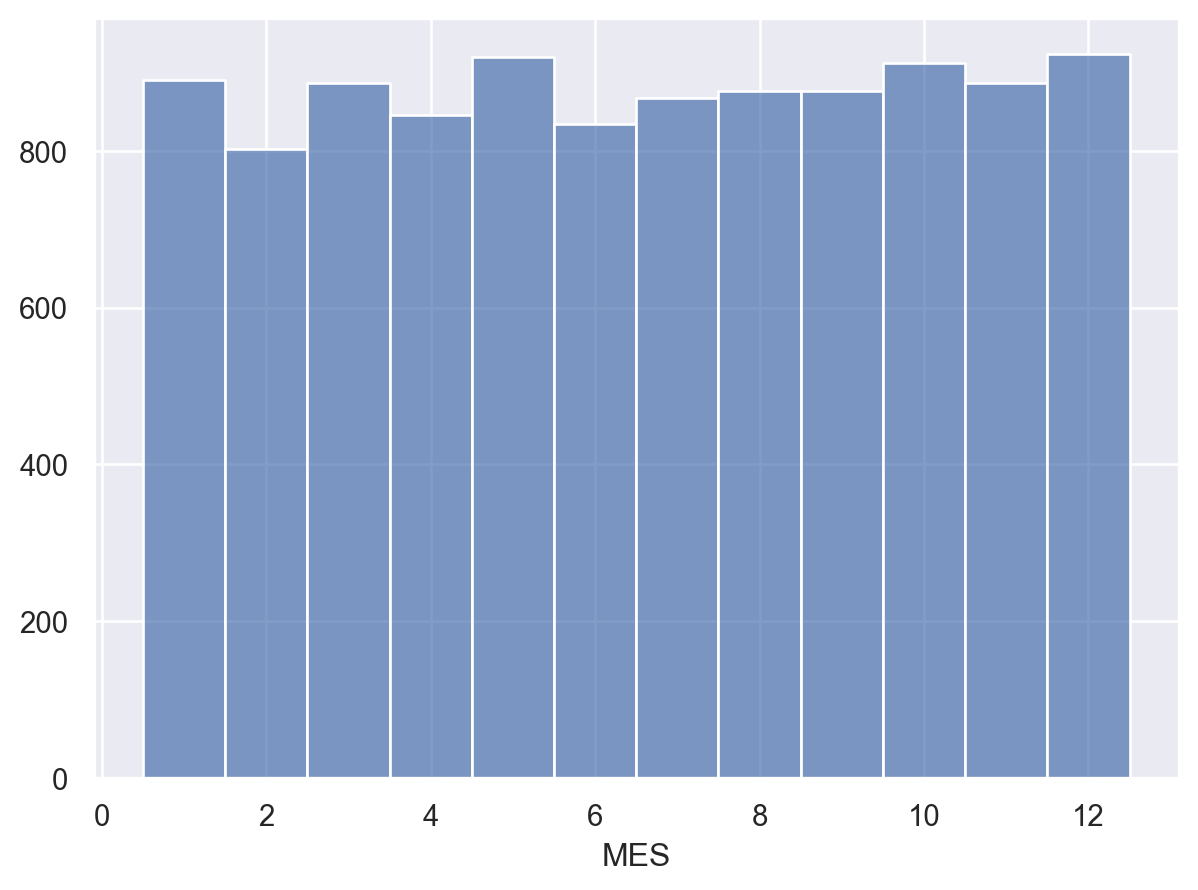

In [47]:
so.Plot(data_sube, x='MES').add(so.Bars(), so.Hist(discrete=True))

In [99]:
datos_amba = data_sube[data_sube['PROVINCIA'] == 'BUENOS AIRES']
datos_amba = datos_amba.rename(lambda x: x.lower(), axis=1) # axis 1 para apuntarle a las columnas
datos_amba = datos_amba[['dia_transporte', 'fecha_dia', 'mes', 'jurisdiccion', 'linea', 'cantidad', 'tipo_transporte']]
datos_amba = datos_amba.rename(columns={
    "cantidad": "pasajeros"
})
datos_amba.head()

,dia_transporte,fecha_dia,mes,jurisdiccion,linea,pasajeros,tipo_transporte
0,2023-01-01,Domingo,1,MUNICIPAL,1,61,COLECTIVO
1,2023-01-01,Domingo,1,MUNICIPAL,2B,11,COLECTIVO
2,2023-01-01,Domingo,1,MUNICIPAL,BS_AS_LINEA 715M,1707,COLECTIVO
3,2023-01-01,Domingo,1,PROVINCIAL,BS_AS_LINEA_326,438,COLECTIVO
4,2023-01-01,Domingo,1,MUNICIPAL,BS_AS_LINEA_512,1189,COLECTIVO


In [132]:
so.Plot(datos_amba, x="mes", y='pasajeros').add(so.Bars(), so.Agg('sum')).facet('tipo_transporte')
colectivos = datos_amba[datos_amba['tipo_transporte'] == 'COLECTIVO']
colectivos = colectivos['pasajeros'].sum()
colectivos


1730129133